<a href="https://colab.research.google.com/github/Jingyu0711/dasanxia-ML-assignments/blob/main/%E7%AC%AC%E4%BA%8C%E6%AC%A1%E5%B0%8F%E4%BD%9C%E4%B8%9ADDL20220511/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,Lasso,ElasticNet

from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 替换sans-serif字体,用来正常显示中文标签,可选['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.
import seaborn as sns
import numpy as np
import pandas as pd

[mlxtend库说明](http://rasbt.github.io/mlxtend/)

[广义线性模型](https://blog.csdn.net/qq_45927003/article/details/120156504?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165208692716782391864750%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165208692716782391864750&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-5-120156504-null-null.142^v9^pc_search_result_control_group,157^v4^control&utm_term=fit_intercept%E5%A6%82%E6%9E%9C%E8%AE%BE%E4%B8%BA+False%EF%BC%8C%E5%AF%B9%E6%A8%A1%E5%9E%8B%E6%9C%89%E4%BB%80%E4%B9%88%E5%BD%B1%E5%93%8D%EF%BC%9F&spm=1018.2226.3001.4187)

# 1 sklearn中的逻辑回归LogisticRegression

also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier.

## 1.1.原理

### 1.1.1.优化方法

[机器学习之正则化](https://www.cnblogs.com/jianxinzhou/p/4083921.html)

正则化是默认应用的，它可以处理密集和稀疏输入。这在机器学习中很常见，但在统计中不常见。正则化的另一个优点是它提高了数值稳定性。

C:正则化强度(系数)的倒数。没有正则化等于将C设置为一个非常高的值。C越小，特征权重越小

**L1正则化**

$\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(e^{- y_i (X_i^T w + c)} + 1)$

**L2正则化**

$\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(e^{- y_i (X_i^T w + c)} + 1)$

**Elastic-Net 正则化** (L1和L2的结合)

$\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(e^{- y_i (X_i^T w + c)} + 1)$

### 1.1.2.参数

**LogisticRegression(
<br>penalty='l2', ('l1','elasticnet','none')
<br>dual=False, ()**
<br>只有用liblinear求解器实现l2惩罚才应用对偶表达式，当样本数>特征数时更常用False
<br>**tol=0.0001, ()**
<br>Tolerance for stopping.控制梯度阈值。如果梯度下降时损失函数减小量小于?时下降就会停止。
<br>**C=1.0, ()
<br>fit_intercept=True, ()**
<br>是否有截据，如果没有则直线过原点
<br>**intercept_scaling=1, ()**
<br>只有当 使用liblinear求解器并且fit_intercept=True 时才有用
<br>**class_weight=None, (dict or 'balanced’)**
<br>用于标示分类模型中各种类型的权重。
<br>None:不考虑权重，或者说所有类型的权重一样。
<br>dict:比如对于0,1的二元模型，定义class_weight={0:0.9, 1:0.1}，这样类型0的权重为90%，而类型1的权重为10%。
<br>'balanced':类库会根据训练样本量来计算权重。某种类型样本量越多，则权重越低，样本量越少，则权重越高。


　　　　那么class_weight有什么作用呢？在分类模型中，我们经常会遇到两类问题：
　　　　第一种:误分类的代价很高。比如对合法用户和非法用户进行分类，将非法用户分类为合法用户的代价很高，我们宁愿将合法用户分类为非法用户，这时可以人工再甄别，但是却不愿将非法用户分类为合法用户。这时，我们可以适当提高非法用户的权重。
　　　　第二种:样本高度失衡。比如我们有合法用户和非法用户的二元样本数据10000条，里面合法用户有9995条，非法用户只有5条，如果我们不考虑权重，则我们可以将所有的测试集都预测为合法用户，这样预测准确率理论上有99.95%，但是却没有任何意义。这时，我们可以选择balanced，让类库自动提高非法用户样本的权重。
　　　　提高了某种分类的权重，相比不考虑权重，会有更多的样本分类划分到高权重的类别，从而可以解决上面两类问题。
    
<br>**random_state=None, ()
<br>solver='lbfgs', ('newton-cg','liblinear','sag','saga')**
<br>1、数据集小，'liblinear'就行；数据集大，'sag'、'saga'更快
<br>2、多类问题，除了'liblinear'都可以
<br>3、'liblinear'仅限于OVR模式
<br>4、求解器支持的惩罚:
<br>'newton-cg' - ['l2','none']
<br>'lbfgs' - ['l2','none']
<br>'liblinear' - ['l1','l2']
<br>'sag' - ['l2','none']
<br>'saga' - ['elasticnet','l1','l2','none'])
<br>**max_iter=100, ()**
<br>使求解器收敛的最大迭代次数
<br>**multi_class='auto', ('ovr','multinomial')**
<br>在多类情况下，'multi_class'='ovr'——训练算法使用one-vs-rest (OvR)方案，'multi_class'='multinomial'（多项）——使用交叉熵损失
<br>**verbose=0, ()**
<br>对于liblinear和lbfgs求解器，将verbose设置为任意正数。
<br>**warm_start=False, ()
<br>n_jobs=None, ()
<br>l1_ratio=None, ()**
<br>只有当 penalty='elasticnet'时才使用。 l1_ratio=0等价于penalty='l2'；l1_ratio=1等价于penalty='l1'；0 < l1_ratio <1, the penalty is a combination of L1 and L2.
<br>**)**

[内容参阅（英文版）](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
[内容参阅（中文版）](https://blog.csdn.net/weixin_42182448/article/details/88634651?ops_request_misc=&request_id=&biz_id=102&utm_term=fit_intercept%E5%A6%82%E6%9E%9C%E8%AE%BE%E4%B8%BA%20False%EF%BC%8C%E5%AF%B9%E6%A8%A1%E5%9E%8B%E6%9C%89%E4%BB%80%E4%B9%88&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-3-88634651.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

### 1.1.3.属性

    classes_        分类器已知的类标签列表
    coef_          决策函数中的特征系数
    intercept_       截距项

### 1.1.4.方法

    fit(X, y[, sample_weight])
    score(X, y[, sample_weight])   返回给定测试数据和标签的平均accuracy。
    
    predict_proba(X)           概率估计，返回一个n行k列的数组，第i行第j列上的数值是模型预测第i个预测样本的标签为j的概率。所以每一行的和应该等于1。
    【argmax】识别每行最大值，返回最大值的下标。
    predict(X)               结合了上面两种，直接返回预测y值
    predict_log_proba(X)       预测对数的概率估计。
    decision_function(X)       预测样本的置信度。置信度与样本到超平面的符号距离成正比。
    
    densify()                  将系数矩阵转换为密集数组格式。
    sparsify()                 将系数矩阵转换为稀疏格式。
    get_params([deep])         获取此估计器的参数。    
    set_params(**params)        设置此估计器的参数。
    

## 1.2 实践-分类

[sklearn几种分类算法建模可视化(实验)](https://blog.csdn.net/haoji007/article/details/103038118?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165209561216782388031590%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165209561216782388031590&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-5-103038118-null-null.142^v9^pc_search_result_control_group,157^v4^control&utm_term=plot_decision_regions&spm=1018.2226.3001.4187)

### 1.2.1 加载鸢尾花数据集、定义分类可视化方法

鸢尾花有三种类别，四种属性['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']，此次实验只选择后两种。

In [ ]:
iris = datasets.load_iris()
y = iris.target
X = pd.DataFrame(data=iris.data[:, [2, 3]], columns=np.array(iris.feature_names)[[2,3]])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #画决策边界,X是特征，y是标签，classifier是分类器，test_idx是测试集序号
    #设置标记生成器和彩色地图
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   #第一个特征取值范围作为横轴
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   #第二个特征取值范围作为纵轴
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  #reolution是网格剖分粒度，xx1和xx2数组维度一样
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #classifier指定分类器，ravel是数组展平；Z的作用是对组合的二种特征进行预测
    Z = Z.reshape(xx1.shape)   #Z是列向量
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #contourf(x,y,z)其中x和y为两个等长一维数组，z为二维数组，指定每一对xy所对应的z值。
    #对等高线间的区域进行填充（使用不同的颜色）
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)   #全数据集，不同类别样本点的特征作为坐标(x,y)，用不同颜色画散点图

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]   #X_test取测试集样本两列特征，y_test取测试集标签

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    edgecolors='black',
                    s=55, label='test set')   #c设置颜色，测试集不同类别的实例点画图不区别颜色

### 1.2.2 二分类（setosa、versicolor）

<ipython-input-3-aebbdfb7f9f9>:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


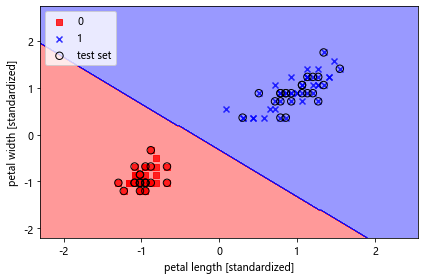

In [ ]:
# 选择类别为0和1的样本
X_part=X.iloc[:100]
y_part=y[:100]
X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.3, random_state=0)

# 标准化特征
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 创建并训练模型
lr = LogisticRegression(C=1000.0, random_state=0) #默认L2正则
lr.fit(X_train_std, y_train)

# 开始画图工作
X_combined_std = np.vstack((X_train_std, X_test_std))   #shape是(100,2)
y_combined = np.hstack((y_train, y_test))   #shape是(100,)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(55, 100))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout() #紧凑显示图片，居中显示；避免出现叠影
plt.show()

### 1.2.3 多分类（全部三种）

共3个类别，2个特征。对于每一个类别，都学习一次系数，因此coef是3×2的：
 [[-8.2245993  -7.26261397]
 [-0.69739252  0.40062126]
 [ 8.92199181  6.86199271]]


<ipython-input-3-aebbdfb7f9f9>:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


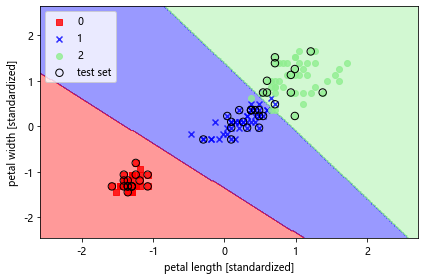

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 标准化特征
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 创建并训练模型
lr = LogisticRegression(C=1000.0, random_state=0) #默认L2正则
lr.fit(X_train_std, y_train)
print("共3个类别，2个特征。对于每一个类别，都学习一次系数，因此coef是3×2的：\n",lr.coef_)

# 开始画图工作
X_combined_std = np.vstack((X_train_std, X_test_std))   #shape是(150,2)
y_combined = np.hstack((y_train, y_test))   #shape是(150,)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout() #紧凑显示图片，居中显示；避免出现叠影
plt.show()

### 1.2.4 在多分类的基础上研究C值对权重的影响

[使用Scikit-Learn库的L2正则化解决过拟合问题](https://blog.csdn.net/ChenVast/article/details/79196325?ops_request_misc=&request_id=&biz_id=102&utm_term=weights,%20params%20=%20%5B%5D,%20%5B%5D&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-79196325.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

[sklearn实现逻辑回归](https://blog.csdn.net/Amy_mm/article/details/79754083?ops_request_misc=&request_id=&biz_id=102&utm_term=weights,%20params%20=%20%5B%5D,%20%5B%5D&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-1-79754083.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

[Logistic回归](https://blog.csdn.net/weixin_46032351/article/details/104524146?ops_request_misc=&request_id=&biz_id=102&utm_term=weights,%20params%20=%20%5B%5D,%20%5B%5D&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-5-104524146.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

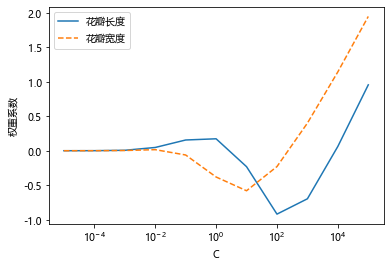

In [ ]:
weights, params = [], []

# （假设）当 c=2 时
for c in np.arange (-5, 6,dtype  = float):
    # C=10^2 ,创建逻辑回归模型lr
    lr = LogisticRegression (C=10 ** c, random_state=0) #默认L2正则
    # 训练lr
    lr.fit (X_train_std, y_train)
    # 选取类别为1（第二种花）的分类权重值，加入weights列表里
    weights.append (lr.coef_[1])
    # 将C值加入params列表里
    params.append (10 ** c)
# 重复，得到C取值在[10^(-5),10^5]之间的不同分类权重值。

weights = np.array (weights)
plt.plot (params, weights[:, 0],label='花瓣长度')
plt.plot (params, weights[:, 1],linestyle='--',label='花瓣宽度')
plt.ylabel ('权重系数')
plt.xlabel ('C')
plt.legend (loc='upper left')
# 如果不要这一行代码，则x轴上显示的刻度值为0,20000,……100000……
plt.xscale ('log')  #在x轴上画对数坐标轴
plt.show ()

# 2 波士顿房价影响因素的简单线性回归、多元回归、多项式回归分析

加载波士顿住房数据集

    CRIM:城镇的人均犯罪率
    ZN:面积超过25,000平方米的住宅用地比例
    INDUS:每个城镇非零售商业用地面积比例
    CHAS:查尔斯河虚拟变量(在河边=1)
    NOX:一氧化氮浓度(千万分之一)
    RM:每栋住宅的平均房间数
    AGE:1940年前建造的自住房屋的比例
    DIS:到波士顿五个就业中心的加权距离
    RAD:径向公路可达性指数
    TAX:每1万美元的全价值房产税
    PTRATIO:按城镇划分的学生教师比例
    B:1000(Bk-0.63)^2, Bk是按城镇划分的非裔美国人后裔的比例（黑人比例）
    LSTAT:低层人口比例
    MEDV:房价中位价（目标变量）

In [ ]:
#正则表达式\s匹配任何空白字符，包括\f,\r,\t,\n,\v,如果文本中有多个分隔符（例如空格和tab同时存在），则可以使用sep=’\s+’，第一个\表示转义。
df= pd.read_csv('housing.data.txt',sep='\s+',header=None,
                  names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 2.1 简单线性回归 LinearRegression
<br>[_](https://blog.csdn.net/After__today/article/details/81427622?ops_request_misc=&request_id=&biz_id=102&utm_term=co1s=%5B%27%20LSTAT%27,%27%20INDUS%27,%27%20NOX%27&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-81427622.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

### 2.1.1 绘制关系图

[Seaborn多种回归分析](https://blog.csdn.net/weixin_46275180/article/details/116550025?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165216549516782246421905%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165216549516782246421905&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-3-116550025-null-null.142^v9^pc_search_result_control_group,157^v4^control&utm_term=regplot%E5%A4%9A%E6%AC%A1&spm=1018.2226.3001.4187)

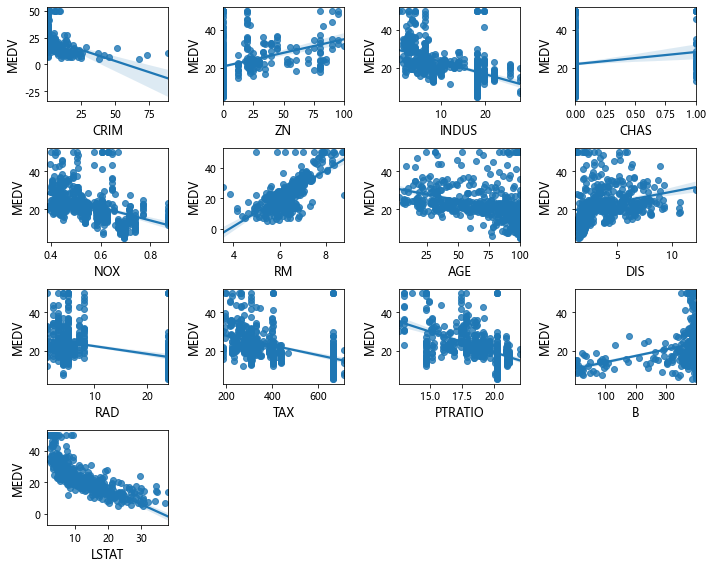

In [ ]:
"""# 设定样式，还原可用sns.reset_orig()
#sns.set(style='whitegrid', context='notebook') # style轴样式参数,context绘制上下文参数

# 选取的四个预测变量及目标变量
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=3)
plt.tight_layout()"""

fig = plt.figure(figsize = (10,8))
for i in range(13):
    plt.subplot(4,4,i+1)
    sns.regplot(x=df.columns[i],y='MEDV',data=df,)
    plt.xlabel(df.columns[i],fontsize = 12)
    plt.ylabel('MEDV',fontsize = 12)
plt.tight_layout()

从图中看出RM、LSTAT和MEDV有线性关系，接下来用更直观的相关系数来看到底哪个（些）预测变量与MEDV相关性最强。

### 2.1.2 关联矩阵

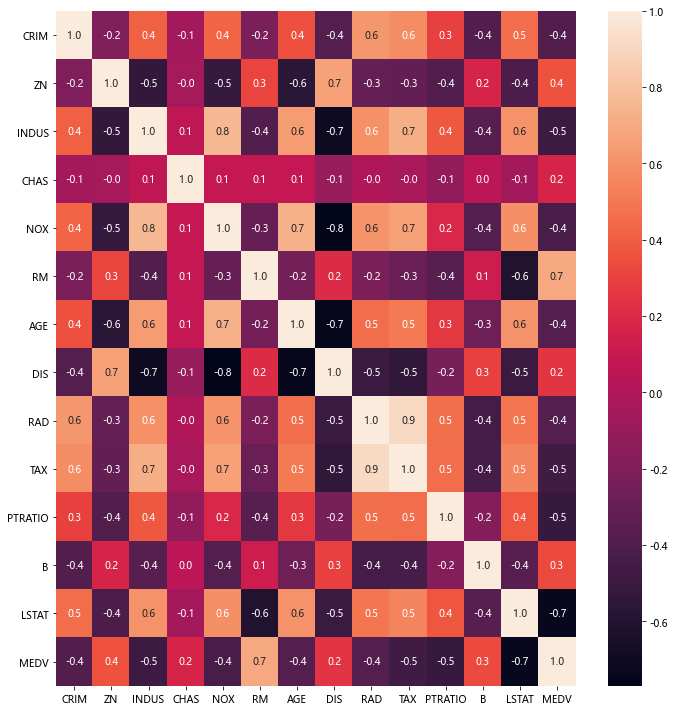

In [ ]:
cm = np.corrcoef(df.values.T)  # 计算相关系数
#sns.set(font_scale=1.5)   # font_scale 单独的缩放因子，可以独立缩放字体大小

# 画相关系数矩阵的热点图
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
hm = sns.heatmap(cm,
        annot=True,    # 在heatmap中每个方格写入数据
        fmt='.1f',   # 矩阵上的标识数字保留1位小数
        #annot_kws={'size': 15},   #annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字等
        yticklabels=df.columns,
        xticklabels=df.columns)
plt.tight_layout()

从热点图很明显看出，LSTAT(低层人口比例)与MEDV呈较强负相关关系，RM(住宅平均房间数目)与MEDV呈较强正相关关系。选择RM做线性回归。

### 2.1.3 拟合模型

标准化数据

In [ ]:
X = df[['RM']].values
y = df[['MEDV']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

训练模型

In [ ]:
lr = LinearRegression()
lr.fit(X_std, y_std)

LinearRegression()

画出拟合模型

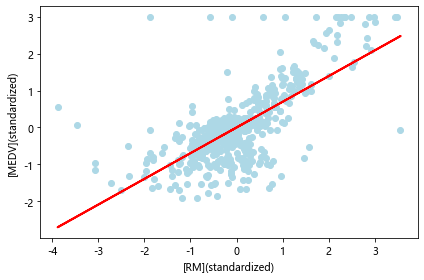

In [ ]:
# 定义一个绘图函数
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('[RM](standardized)')
plt.ylabel('[MEDV](standardized)')
plt.tight_layout()

## 2.2 多元回归

[选取最优模型](https://blog.csdn.net/weixin_41744624/article/details/109112994?ops_request_misc=&request_id=&biz_id=102&utm_term=%27CRIM%27,%27ZN%27,%27INDUS%27,%27CHAS%27,%27NO&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-1-109112994.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)
[选择模型](https://blog.csdn.net/LIGHTER_06/article/details/122987774?ops_request_misc=&request_id=&biz_id=102&utm_term=%27CRIM%27,%27ZN%27,%27INDUS%27,%27CHAS%27,%27NO&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-0-122987774.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

In [ ]:
array = df.values
X = array[:,0:13]
y = array[:,13]

# 将90%的样本作为训练集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

### 2.2.1 线性回归LinearRegression

假设输入变量具有高斯分布、输入变量与输出变量相关、输入变量之间不高度相关（称为共线性的问题）。    
    
    最小二乘法
$\min_{w} || X w - y||_2^2$

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("训练集的MSE:%.3f" % metrics.mean_squared_error(y_train, y_train_pred))
print("测试集的MSE:%.3f" % metrics.mean_squared_error(y_test, y_test_pred))

训练集的MSE:22.127
测试集的MSE:20.544


### 2.2.2  岭回归Ridge regression

    通过对系数的大小施加惩罚来改良最小二乘法。通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价，获得回归系数更符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。岭系数使惩罚残差平方和最小化
$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

In [ ]:
model = Ridge()

In [ ]:
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("训练集的MSE:%.3f" % metrics.mean_squared_error(y_train, y_train_pred))
print("测试集的MSE:%.3f" % metrics.mean_squared_error(y_test, y_test_pred))

训练集的MSE:22.325
测试集的MSE:20.135


### 2.2.3 套索回归Lasso(最小绝对收缩和选择算子)

套索回归算法和岭回归算法类似，也会惩罚回归系数，在套索回归中惩罚回归系数的绝对值，而在岭回归中惩罚回归系数的平方，这导致惩罚（或等于约束估计的绝对值之和）值使得一些参数估计结果等于零。因此，它能够减少变化程度并提高线性回归模型的精度。使用惩罚值越大，进一步估计会使缩小值越趋近零。这将导致要从给定的n个变量中选择变量。如果预测的一组变量高度相似，套索回归算法会选择其中的一个变量，并将其他的变量收缩为零。

    最小化的目标函数为：
$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

In [ ]:
model = Lasso()

In [ ]:
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("训练集的MSE:%.3f" % metrics.mean_squared_error(y_train, y_train_pred))
print("测试集的MSE:%.3f" % metrics.mean_squared_error(y_test, y_test_pred))

训练集的MSE:27.233
测试集的MSE:28.897


### 2.2.4 弹性网络Elastic-Net¶

弹性网络回归算法是套索和岭回归的混合体，在模型训练时，弹性网络综合使用L1和L2两种正则化方法。当有多个相关的特征时，弹性网络回归算法是很有用的，套索回归算法会随机挑选算法中的一个，而弹性网络回归算法则会随机选择两个。与套索回归算法和岭回归算法相比，其优点是：
<br>弹性网络回归算法允许弹性网络回归继承循环状态下岭回归的一些稳定性；
<br>在高度相关变量的情况下，弹性网络回归算法会产生群体效应；
<br>选择变量的数目没有限制；
<br>可以承受双重收缩。

    最小化的目标函数为：
$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$

In [ ]:
model = ElasticNet()

In [ ]:
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("训练集的MSE:%.3f" % metrics.mean_squared_error(y_train, y_train_pred))
print("测试集的MSE:%.3f" % metrics.mean_squared_error(y_test, y_test_pred))

训练集的MSE:26.591
测试集的MSE:28.126


### 2.2.6 多项式回归

以 LSTAT(低层人口比例) 为因素变量，分析其与房价的二次关系
<br>[多项式回归(波士顿房价预测)](https://blog.csdn.net/weixin_46032351/article/details/104523891?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165215813716782350933229%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165215813716782350933229&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-104523891-null-null.142^v9^pc_search_result_control_group,157^v4^control&utm_term=%E6%B3%A2%E5%A3%AB%E9%A1%BF%E5%A4%9A%E9%A1%B9%E5%BC%8F%E5%9B%9E%E5%BD%92&spm=1018.2226.3001.4187)

In [ ]:
"""
# X
X=np.array([ 258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])\
[:, np. newaxis]
# y
y=np. array([ 236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8])
# 增加X轴坐标点
X_fit=np.arange(250,600,10)[:, np. newaxis]
"""
X = df[['LSTAT']].values
y = df[['MEDV']].values
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]


# 添加一个二次多项式
quadratic=PolynomialFeatures(degree=2)
# X^2
X_quad=quadratic.fit_transform(X)
# 增加的X轴坐标点上的X^2
X_quad_fit=quadratic.fit_transform(X_fit)

In [ ]:
# 拟合简单线性回归模型进行比较:
lr1=LinearRegression()
lr1.fit(X,y)
y_lin_fit=lr1.predict(X_fit)

In [ ]:
# 对变换后的特征拟合多元回归模型进行多项式回归:
lr2=LinearRegression()
lr2.fit(X_quad,y)
y_quad_fit = lr2.predict(X_quad_fit)

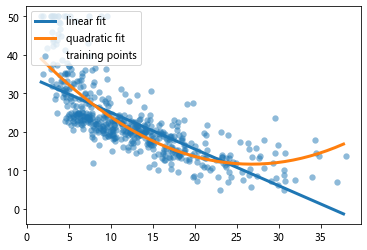

In [ ]:
# 画图
plt. scatter(X,y, label=' training points',alpha=0.5,linewidths=0.2)
plt. plot(X_fit,y_lin_fit, label=' linear fit',lw=3)
plt. plot(X_fit,y_quad_fit, label=' quadratic fit',lw=3)
plt. legend(loc='upper left')
plt. show()